<a href="https://colab.research.google.com/github/stat10/DS10-Projects/blob/main/DS10_2021_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>
# DS10 Wine Classification - Part 1
Notebook by Rashmi Banthia and Hanspeter Pfister

**Make a copy of this notebook before you make any edits.** Add your name and the name of your team and team members in the text cell below. Answer all of the questions inside the notebook using text and code. Add your answers after the **A** in the text cells. Each team will only submit one notebook. Check the project instructions on Canvas for more information.

This notebook covers the following topics:

 - EDA 
    - Correlation heatmap for features, feature histograms, SPLOM

 - Regression
   - Linear Regression
   - Multilinear Regression
   
- Classification
   - Error Metrics for Classification
   - Logistic Regression
   - Support Vector Machines 
   - KNearest Neighbors 
   - Decision Tree Classifier

<img src=https://imgs.xkcd.com/comics/machine_learning.png />



--------
**Team Name:**

**Team Members:**

--------

In [ ]:
# Pandas is a powerful package that deals with tables (https://pandas.pydata.org)
# You will get a proper introduction to Pandas in the labs.
import pandas as pd
# Of course we will be using Numpy
import numpy as np

# We are using scikit-learn for machine learning (https://scikit-learn.org/stable/)
# Because scikit-learn is a big package it is good practice to only import the modules we need.
import graphviz 
from sklearn.tree import export_graphviz

from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# We will be using statsmodels for linear regression (https://www.statsmodels.org/stable/index.html) 
import statsmodels.api as sm
from statsmodels import graphics

# Some useful libraries to import data
import requests
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Libraries for visualizations
from matplotlib import pyplot as plt
import seaborn as sns
# Some settings to make the plots prettier
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=0.9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1 - EDA and Modeling

In [ ]:
# Print the information about the dataset - we'll be using red wine data 
target_url = 'https://raw.githubusercontent.com/hpfister/ds10/master/winequality.names'
#target_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names' # Alternate URL

response = requests.get(target_url)
data = response.text
print(data)

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [ ]:
# Reading the dataset into a Pandas dataframe (df)
df = pd.read_csv('https://raw.githubusercontent.com/hpfister/ds10/master/winequality-red.csv', sep=';')
# 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' # Alternate URL
print(df.shape) # we have 1599 rows and 12 columns
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Take a look the project instructions for more explanations of this dataset. 

**Q** Explain how this data could be used for a classification *and* a regression problem, indicate what data we are predicting, and provide the number of data points (N) and the list of features.

**A** 
 

## Exploratory Data Analysis

In [ ]:
# Using Pandas to output summary statistics for each feature
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Compare the output above to Table 1 in the project description. 

**Q** Compare the summary statistics of the red wines in this dataset to the summary statistics of the white wines (a different dataset) shown in Table 1. For which features do you see big differences between red and white wines? List those features and explain the difference for each using quantitative values.

**A** 


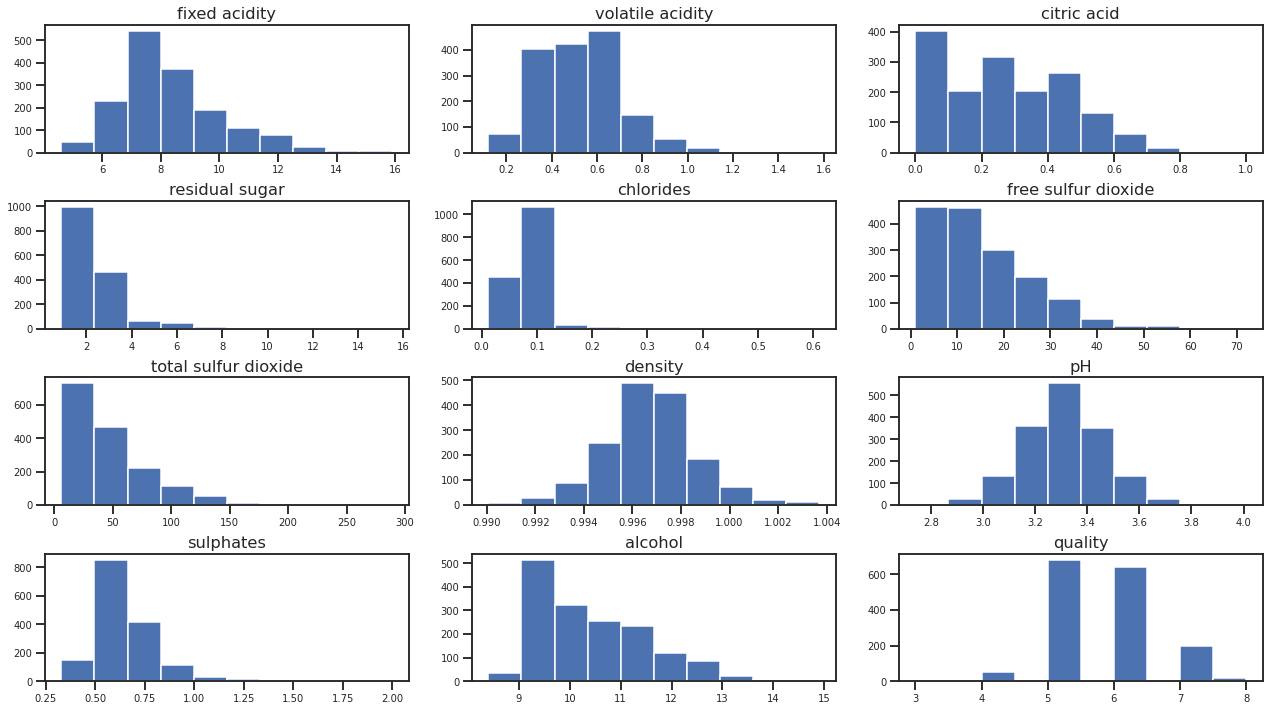

In [ ]:
# Plot histograms for each feature
fig, axs = plt.subplots(4, 3,figsize=(18,10))
fig.tight_layout(pad=1.5)
col = np.array(df.columns).reshape((4,3))

for i in range(4):
  for j in range(3):
    axs[i,j].tick_params(axis="x", labelsize=10)
    axs[i,j].tick_params(axis="y", labelsize=10)
    axs[i,j].set_title(col[i,j])
    axs[i,j].hist(df[col[i,j]]);


**Q** What do you notice about the distributions of the feature? Which of them are skewed, and in what way? What do you notice about the predicted value `quality`?

**A** 


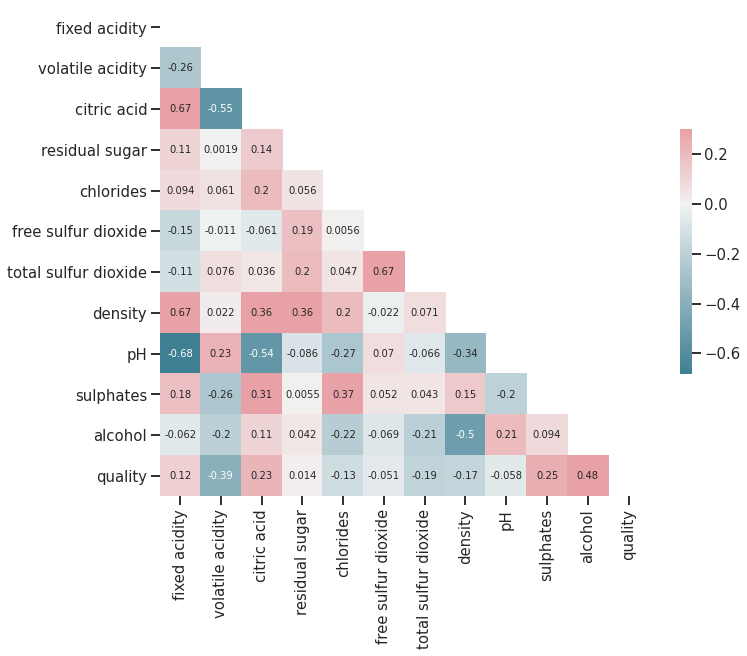

In [ ]:
# Create a feature correlation heatmap (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
# Compute the correlation coefficients using the Pandas corr() function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
corr = df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10}) ;


This is a feature correlation heatmap. It shows correlation coefficients for each pair of features. Currently, we are computing the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (also see Spiegelhalter). Higher values mean the features are more correlated. Correlation can be positive (red) or negative (blue). 

**Q** What correlations do you notice among the features in this dataset?

**A** 

------

In the code above, change the correlation coefficient from `method='pearson'` to `method='spearman'` to compute the [Spearman rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). It is easier to compare the results if you download an image of the visualization (right click, Download Image) before making this change and then compare the images. 

**Q** Do you notice a big difference for a feature between Pearson vs. Spearman correlation, and can you explain that difference? (We are *not* looking for a biochemical explanation!)

**A** 


## Scatterplot Matrix
A scatterplot matrix (SPLOM) plots a scatterplot for each pair of variables in a dataset. In other words, a scatter plot matrix visualizes the *bi-variate or pairwise relationship between different combinations of variables* while laying them out in grid form. 

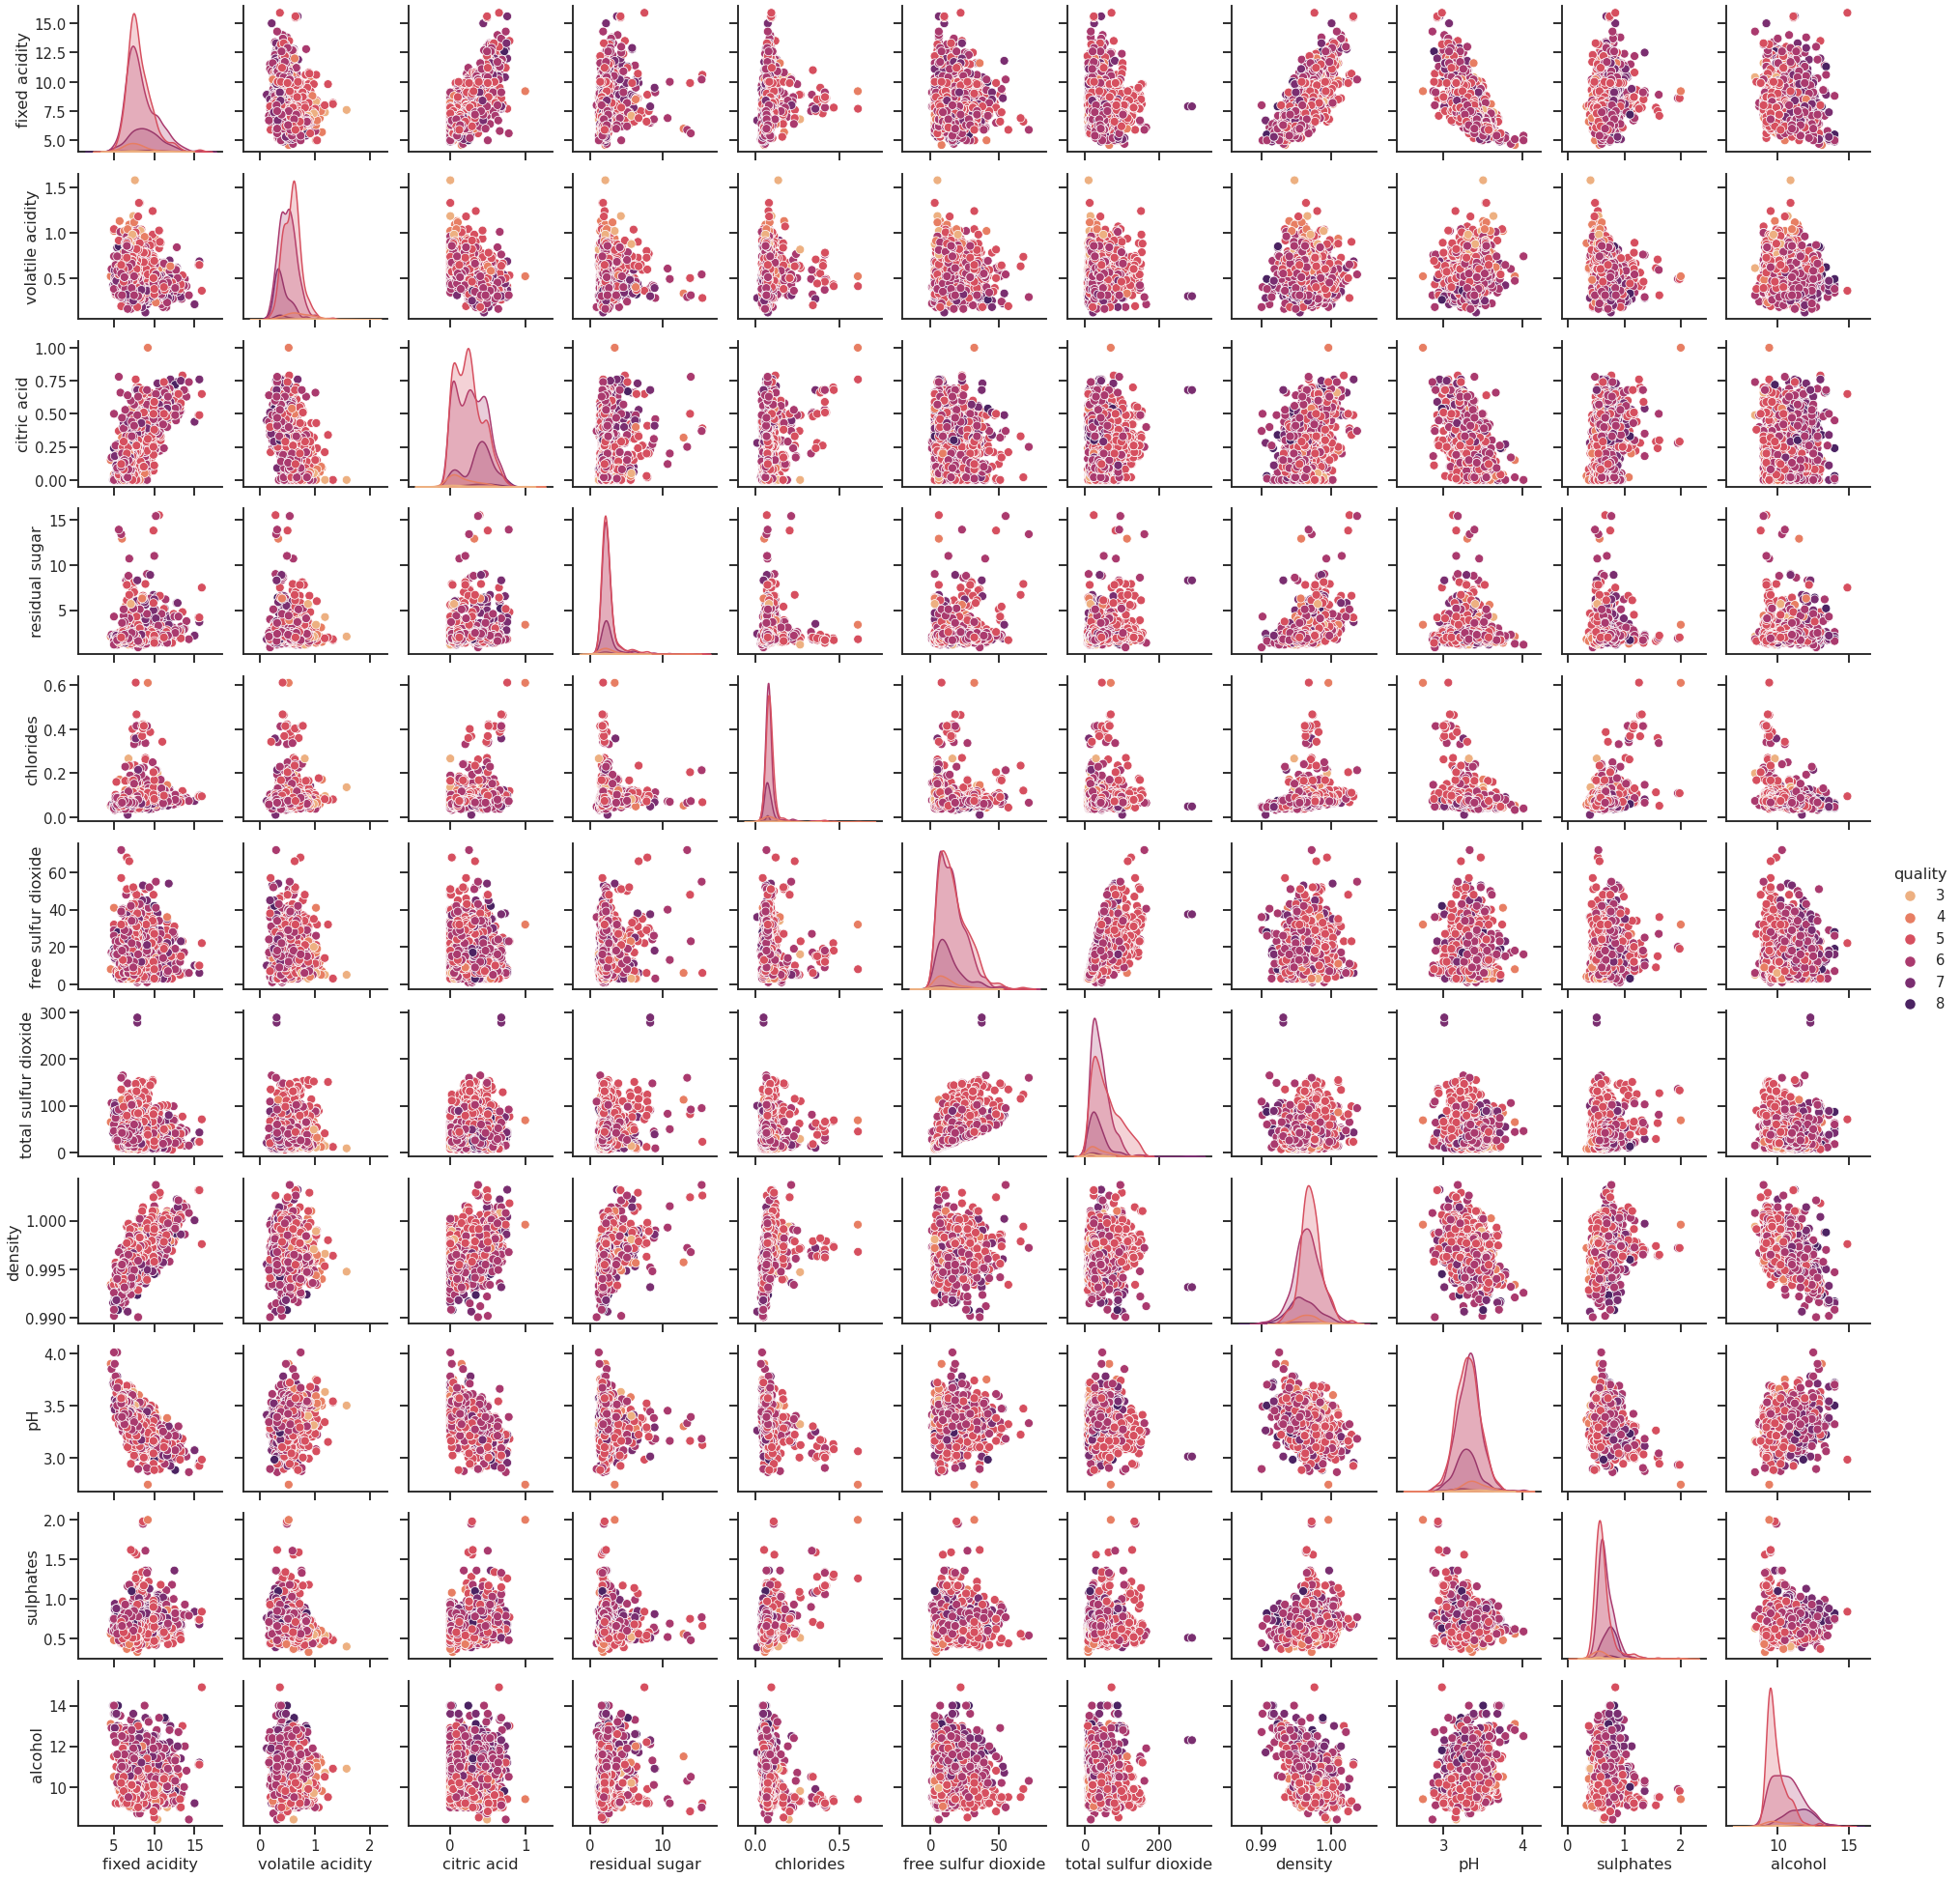

In [ ]:
# This is using the fantastic Seaborn package for plotting
# Students get this original code
#sns.pairplot(df, hue="quality", palette="tab10"); # This will take a while to compute - be patient! 
# Instructor solution w/ better color palette
sns.pairplot(df, hue="quality", palette="flare"); # This will take a while to compute - be patient!

The visualization shows the pairwise scatterplots for each feature, using color for the predicted value `quality`. 

**Q** The color palette is currently set to `palette="tab10"`, which is not optimal for the ordinal predicted value `quality`. Take a look at the [Seaborn documentation for choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) and choose a more appropriate palette. Why did you choose this palette?

**A** 


------

The diagonal shows continuous versions of the histograms for each feature and quality level. 

**Q** Compare the feature distributions along the diagnonal with the discrete histograms we plotted before. What do you notice, and for which features? 

**A** 


------

**Q** Compare the scatterplot matrix (SPLOM) to the feature correlation heatmap above. Download the images (right click, Download Image) and compare the visualizations next to each other. In general, what do you notice about feature correlations in the SPLOM that you did not notice before? 

Identify **at least two feature pairs** for which the SPLOM shows the correlations you were expecting based on the respective correlation coefficients. How are the scatterplots the same as the correlation coefficients? Add the coefficient types (Spearman or Pearson) and values.

Identify **at least two feature pairs** for which the SPLOM shows a different, maybe surprising picture compared to the respective correlation coefficients. How do the scatterplots differ from the correlation coefficients? Add the coefficient types (Spearman or Pearson) and values.

**A** 

------

**Q** Is there anything you notice about outliers in the SPLOM? (It would be nice if you had interactive tooltips for this, right?) 

**A** 

## Predicted Value

Our target predicted value is `quality`, which is a discrete ordinal value in the range [3, 8]. First, lets take a look at the number of wines for each quality level in the dataset. 

In [ ]:
# Our target Predicted value is quality 
print(df.quality.value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


**Q** What do you notice about the distribution of `quality` in this data? Could that be a problem when we are building our model? 

**A** 


------

We are going to convert this into a binary classification problem. I.e., we will convert the ordinal values of `quality` into a binary class [0, 1] (0 = bad quality, 1 = good quality). We decide that wines with quality `>=6` are good quality (i.e., `quality=1`) and wines with quality `<6` are bad quality (i.e., `quality=0`). 

In [ ]:
# By convention, the perdictor are stored in the vector Y
Y = df.quality

# By convention, the features are stored in the vector X
X = df[df.columns.difference(['quality'])]
print(X.shape, Y.shape)

# Students get this original code
# Convert Y to a vector with binary values. Ratings 6,7,8 are good quality, <6 are bad quality
Y = np.array([1 if y>=6 else 0 for y in Y])

# Instructor solution: Change the ratings threshold to get an imbalanced dataset 
# Imbalanced: Ratings 7,8 are good quality,  3,4,5,6 are bad quality
# Y = np.array([1 if y>=7 else 0 for y in Y])

# Print the percentage of samples in each class
print("\n\nBinary Classification (1 = Good quality  , 0 = Bad quality): ")
print(pd.Series(Y).value_counts(normalize=True))  

(1599, 11) (1599,)


Binary Classification (1 = Good quality  , 0 = Bad quality): 
1    0.534709
0    0.465291
dtype: float64


**Q** What is the difference between binary classification and multiclass classification? Why are we converting this problem to binary classification? Could we keep it as multiclass classification?   

**A** 


# Modeling 

We are now going to build several machine learning models for this data following these steps:

Step 1: [**Split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) the dataset into training and test sets.

Step 2: [**Standardize**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler) the features.

Step 3: **Train** the machine learning models using the training data.

Step 4: **Evaluate** their performance on the test data.

Throughout the modeling process you are going to explore several *hyperparameters*. A hyperparameter is a property of the data preparation or learning algorithm that influences the way the machine learning algorithm works. Hyperparameters have to be set by the data scientist before running the algorithm. 

*Parameters* of the machine learning model are learned by the learning algorithm based on the training data. The goal of learning is to find the values of the parameters that make the model optimal in a certain sense.

**Step 1: Split**

First we will split the dataset into training and test sets using the scikit-learn [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. The percentages we allocate to training and test sets are hyperparameters. Typical values are 80% training data and 20% test data. 


In [ ]:
# Split data into train (80%) and test (20%) sets.
# radom_state: Controls the shuffling applied to the data before applying the split. 
#              Pass an int for reproducible output across multiple function calls.
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=10)


**Step 2: Standardize**

As you noticed during EDA, feature ranges vary widely. We will apply *standardization* to rescale the feature values so that they have a *normal distribution* with `mean=0` and standard deviation `std_dev=1`. 

Read [this blog post](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) about the need for feature standardization and the different standardization methods in scikit-learn. The type of standarization of the features is another hyperparameter. 


In [ ]:
# Function to plot histograms of features
def plot_train(data):

    # Plot histograms for each feature
    fig, axs = plt.subplots(4, 3,figsize=(15,10))
    fig.tight_layout(pad=1.5)
    col = np.array(df.columns)

    for i in range(4):
      for j in range(3):
        axs[i,j].tick_params(axis="x", labelsize=10)
        axs[i,j].tick_params(axis="y", labelsize=10)
        axs[i,j].set_title(col[i*3+j])

        # Plot quality separately since we removed it from X_train
        if (i == 3) and (j == 2): 
            axs[i,j].hist(y_train);
            break

        # Plot the other feature histograms
        axs[i,j].hist(data[col[i*3+j]]);

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,10.399322,0.088389,0.272588,0.996772,8.323690,15.881548,3.308702,2.552697,0.660485,47.052385,0.525188
std,1.050573,0.049852,0.192388,0.001870,1.720377,10.413509,0.151832,1.398478,0.178352,33.266612,0.177109
min,8.400000,0.012000,0.000000,0.990070,4.600000,1.000000,2.740000,0.900000,0.330000,6.000000,0.120000
25%,9.500000,0.071000,0.100000,0.995655,7.100000,8.000000,3.210000,1.900000,0.550000,22.000000,0.390000
50%,10.100000,0.079000,0.260000,0.996800,7.900000,14.000000,3.300000,2.200000,0.620000,38.000000,0.520000
75%,11.000000,0.090000,0.420000,0.997825,9.200000,21.000000,3.400000,2.600000,0.730000,63.000000,0.630000
max,14.900000,0.611000,1.000000,1.003200,15.900000,72.000000,4.010000,15.500000,2.000000,289.000000,1.580000


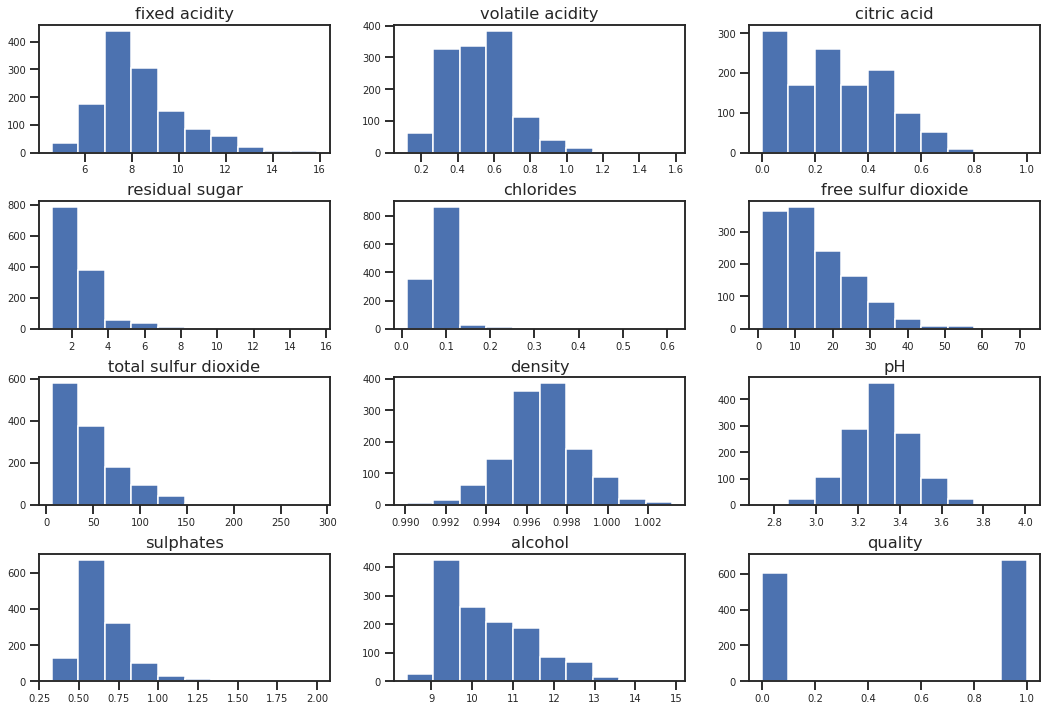

In [ ]:
# Checking the features in the training data (80% of all data) before standardization
display(X_train.describe())

plot_train(X_train)

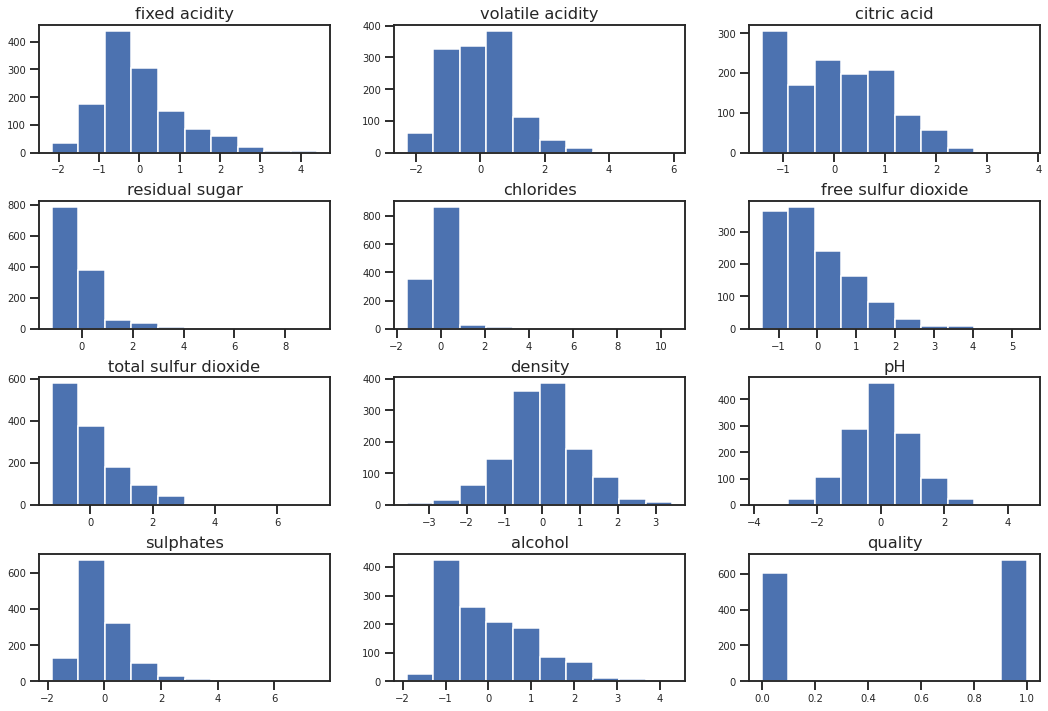

In [ ]:
# Standardize the features

# We standardize training and test data separately to avoid information leakage between them
# Also note we do not standardize predicted value `quality`, just the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# sklearn StandardScaler() returns Numpy arrays. That means your column names are gone. 
# If we want to preserve the column names we need to convert the array back to a Pandas dataframe and add the column names. 
X_train_s = pd.DataFrame(X_train_s,columns=X.columns)
X_test_s = pd.DataFrame(X_test_s,columns=X.columns)

# Check that the standardized features in the training data have mean=0 and std_dev=1
X_train_s.describe()

plot_train(X_train_s)

To answer the following question, read the [documentation for the StandardScaler() function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler) we used. 

**Q** Compare these values to the values before standardization for X_train (above). Can you explain the new range of **at least one** of the standardized features mathematically or by computing it in Python? (Note: StandardScaler() uses 1/N for the computation of std_dev.)

**A** 

**Step 3: Train**

With our standardized training data in hand we can now train several basic machine learning models. For a description of each model watch the video lectures and read Spiegelhalter and the ML book (on Canvas).


# Regression Models

## Simple Linear Regression

We start by using linear regression to predict ordinal `quality` labels in the range [0, 10]. To get started, we will use only one feature for the regression. Looking at the feature correlation map, we notice that the feature `alcohol` has a good positive correlation with `quality`. A linear regression for one feature and one target value is called a simple linear regression. We are going to use the package `statmodels` because it will give us a lot of statistical information about the model at the end. 

In [ ]:
# Create new feature / target vectors from the original data
X_lr_1 = df.alcohol
y_lr_1 = df.quality

# Check how many target values we have in the original data
print("Unique quality values:", df.quality.unique())

Unique quality values: [5 6 7 4 8 3]


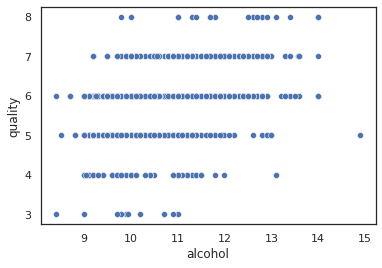

In [ ]:
# Scatterplot for alcohol vs quality
sns.set_theme(style="white")
sns.scatterplot(x=df.alcohol,y=df.quality);

In [ ]:
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=10)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     344.6
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.79e-68
Time:                        00:03:34   Log-Likelihood:                -1370.6
No. Observations:                1279   AIC:                             2745.
Df Residuals:                    1277   BIC:                             2756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9871      0.197     10.097      0.0

**Interpreting these results**

As promised, `statsmodels` outputs a lot of information. Take a look at the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html). Remember that the linear model is Y = W * X + b, where W is a vector with coefficients w_i for each feature, X is the vector of features, and b is a real-valued constant (see Ch. 3 in the ML book). 

Here are some of the values you should look at in the table above, starting with the table in the middle containing `const` and the features, in this case `alcohol`:

*For each of the features in X (x1, x2, etc.):*

* *const -> coef*  - The value of b (the regression line intercept). Estimates the Y value (predicted `quality`) when all X's (features) are 0. 

* *coef:* - The estimate of the slope (w_i) for each feature. 

* *std err:* - The amount we would expect each feature value to change if we re-did the data collection and re-ran our model. You will read more about standard errors in Spiegelhalter. 
    
* *P>|t| (p-value):* - The p-value for each feature coefficient measures the probability of seeing coefficients this big (or even bigger) if the given feature did not actually matter. If the p-value is significantly less than 0.05 we can say that there is a statistically significant association between this feature and the predicted value.
    
* [0.025 0.975]: - Endpoints of the 95% confidence interval. This interval gives an indication of where the true slopes (w_i) values might plausibly fall.

*Summmary statistics (top):*

* *$R^2$*  -  The variability explained by the model. An $R^2$ of 1 indicates that the regression model perfectly fits the data.

* *AIC* - Akaike Information Criterion. Based on the log-likelihood. The smaller the AIC value the better the model.

* *BIC* - Bayesian Information Criterion. The smaller the BIC value the better the model.

* *F-statistic and Prob (F-statistic)* -  The F-statistic and the corresponding p-value tell us the overall significance of the regression model, i.e., whether explanatory variables in the model are useful for explaining the variation in the response variable. If the p-value is less than 0.05 our model is statistically significant, i.e., the features are deemed to be useful for explaining the variation in the predicted value.


**Q** Interpret the results of the simple linear regression model using the table above. First, write down the equation of the regression line, i.e., the relationship between `quality` and `alcohol`. Then compute an example predicted value for `quality` assuming `alcohol=11`. Finally, look at the summary statistics and explain if this is a good model or not.  

**A** 


-----

Next, let's look at visualizations of the result of our simple linear regression. We are going to do this for the training data. 

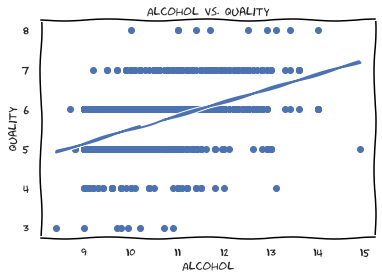

In [ ]:
# Plotting the regression line for training data

# xkcd style plotting with matplotlib - for some fun :)
# The `with` statement in Python has block scope, i.e., we only apply xkcd style to this plot
with plt.xkcd(): 
  plt.scatter(x=X_train_lr_1,y=y_train_lr_1)
  plt.plot(X_train_lr_1, lr_1_results.fittedvalues)
  plt.title('Alcohol vs. Quality')
  plt.xlabel('Alcohol')
  plt.ylabel('Quality');

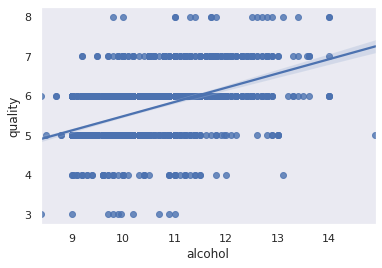

In [ ]:
# Seaborn has a handy regplot() function to do this more easily
sns.set_theme(style="dark")
sns.regplot(x=df.alcohol, y=df.quality,);

One of the key assumptions of linear regression is that the residuals of a regression model are roughly normally distributed and are [homoscedastic](https://www.statology.org/heteroscedasticity-regression/) at each level of the explanatory variable. If these assumptions are violated, then the results of our regression model could be misleading or unreliable.

To verify that these assumptions are met, we can create the following residual vs. fitted values plots. The `residual` is the difference between an observed value (e.g., in the test data) and the value predicted by the model.  

The function plot_regress_exog produces four plots. The one in the top right corner is the residual vs. fitted plot. The x-axis on this plot shows the actual values for the feature variable (`alcohol`) and the y-axis shows the residuals for each value. As long as the residuals appear to be randomly and evenly distributed throughout the chart around the value zero, we can assume that homoscedasticity is not violated.

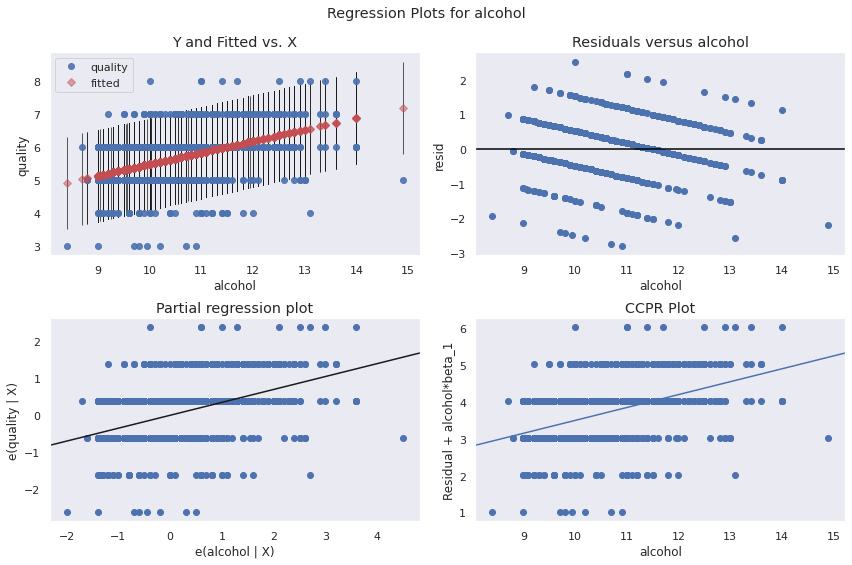

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'alcohol', fig=fig)

**Q** What do you notice about the residuals for this regression model? Do they indicate that 

**A** 

-----
Another useful plot for simple linear regression is a [Q-Q plot](https://data.library.virginia.edu/understanding-q-q-plots/) of the residuals. This plot is useful for determining if the residuals follow a normal distribution. If the data values in the plot fall along a roughly straight line at a 45-degree angle, then the data is normally distributed.


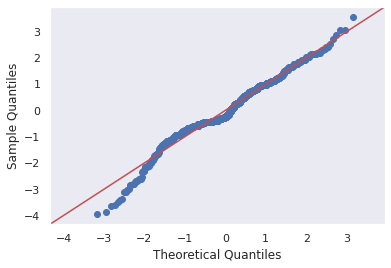

In [ ]:
#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 

**Q** Looking at the Q-Q plot, do you think that heteroscedasticity is a problem?

**A** 

-----
Finally, we can generate an [influence plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.influence_plot.html) to identify observations that have an unusually large influence on the estimation of the predicted value of the response variable, or that are outliers, or both. The leverage always takes on values between zero and one. A point with zero leverage has no effect on the regression model. And outliers are observations with residuals greater than 2 or less than -2.

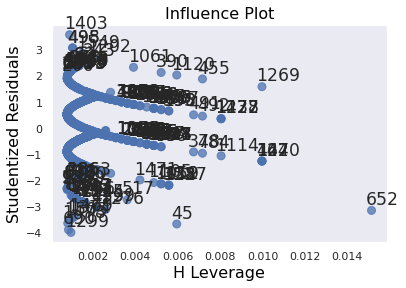

In [ ]:
# Create influence plot
fig = sm.graphics.influence_plot(lr_1_results, size = 8)
plt.show()

**Q** What do you notice in the influence plot? 

**A** 

## Multiple Linear Regression

Instead of just using one feature, we can do a linear regression with all of the features in the data. Again, we will do this for the ordinal predictor `quality` in the range [3, 8]. This is called a multiple linear regression. 

In [ ]:
# Create new feature / predicted value vectors from the original data
X_mlr = df[df.columns[df.columns!='quality']]
y_mlr = df.quality

print("Unique quality values:", df.quality.unique())

Unique quality values: [5 6 7 4 8 3]


In [ ]:
# Create new training and test sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr,
                                                    test_size=0.2,
                                                    random_state=10)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Create linear regression model (for all features)
mlr_model = sm.OLS(y_train_mlr, sm.add_constant(X_train_mlr) )

# Fitting the model to the data (i.e., training the model)
mlr_results = mlr_model.fit()

# Printing summary statistics of the model
print(mlr_results.summary())

# Predictions on the test set
mlr_preds = mlr_results.predict(sm.add_constant(X_test_mlr))


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     62.92
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          9.11e-112
Time:                        00:03:38   Log-Likelihood:                -1244.6
No. Observations:                1279   AIC:                             2513.
Df Residuals:                    1267   BIC:                             2575.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.0806 

**Q** Interpret the results of the multiple linear regression model using the values of the table above.

**A**


In [ ]:
X_test_mlr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1518,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
1246,7.4,0.74,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4
1343,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
428,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3


In [ ]:
print("Actual quality values in test set:")
print(y_test_mlr[:5].values, "\n")

print("Multiple linear regression predictions:")
print(mlr_preds.values[:5])  # Printing first 5 predictions 

Actual quality values in test set:
[5 5 6 6 5] 

Multiple linear regression predictions:
[5.63823892 5.2127465  5.70135223 5.6609392  5.36987594]


**Q** Modifying the code above, look at some of the predictions of the model and compare them to the actual values in the test set. How well do you think the model works?

**A** 

# Classification Models

## Evaluation Metrics for Classification

It is difficult to interpret classification results with the metrics we looked at so far. Before we proceed it is important to introduce proper evaluation metrics for classification. 

These metrics were originally developed for clinical trials, so to keep with the standard terminology, we define "good" wines (value of 1) as "positive" and the "bad" wines (value of 0) as the "negatives". We then define the following:

$P$ - number of all positives in the sample.

$N$ - number of all negatives in the sample.

$TP$ - number of true positives: how many of the "positive" guesses of the classifier are true.

$TN$ - number of true negatives; how many of the "negative" guesses of the classifier are true.

$FP$ - number of false positives: how many of the "positive" guesses of the classifier are actually negatives.

$FN$ - number of false negatives; how many of the "negative" guesses are actually positives.

The `score()` functions in scikit-learn uses the default error measure of **accuracy**. This is simply the ratio of successful guesses (both positives and negatives) across all samples:

$$\text{accuracy} = \frac{TP + TN}{P+N}.$$

When there are imbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. For this reason, we usually want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers. 

Usually, the goal is to identify the members of the positive class (typically the rare class) successfully -- this could be either the good wines or the patients presenting a rare disease. It is common practice to define the following ratios:

(1) The **true positive rate** rate (also called **sensitivity** or **recall**) is the ratio of true positive predictions among all positives:

$$\text{TPR} = \text{Sensitivity} = \text{Recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$

The true positive rate measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition). Thie metric is appropriate when minimizing false negatives is the focus.

(2) The **true negative rate** (also called **specificity**) is the ratio of true negative predictions among all negatives:

$$\text{True Negative Rate} = \text{Specificity} = \frac{TN}{TN+FP} $$

The true negative rate measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition). Thie metric is appropriate when minimizing false positives is the focus.

(3) **Precision Score** The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. 

$$\text{Precision} = \frac{TP}{TP + FP} $$

(4) **F1 Score** F1 Score is harmonic mean of precision and recall. It provides a single score that balances both precision and recall. Commonly used for imbalanced classification.  The best value is 1 and the worst value is 0.

$$\text{F1 = }\frac{2 * (precision * recall)}{(precision + recall)}$$ 

Finally, here is a visual summary using a so-called `confusion matrix` of all these metrics and some additional ones. 

![Confusion Matrix](https://raw.githubusercontent.com/stat10/DS10-Projects/main/Images/confusion_matrix.png)
Image Source: https://en.wikipedia.org/wiki/Confusion_matrix

-----
With these error metrics we are now going to create and train several classification models using scikit-learn. Notice how simple and uniform the API is for the different models. 

## [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

As you know from the readings and video lectures, we have to use logistic regression for classification. 

In [ ]:
# A quick reminder of our training data
# Print standarized training data
X_train_s.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,0.286315,-0.489413,-1.417421,-0.948163,-1.351215,2.316980,1.523972,-0.323834,1.511733,0.208928,-0.085787
1,1.238549,-0.409144,0.610527,-0.862546,0.160673,-0.949287,0.272103,-0.538437,0.165553,-1.054093,-0.594148
2,-0.475472,-0.088067,-1.417421,0.817671,-0.595271,-0.949287,1.985187,-0.395368,1.680005,-0.723302,0.761482
3,1.238549,-0.509480,0.298535,-0.862546,0.451420,-0.276821,-0.320888,-0.359601,1.006915,-0.603014,-1.328447
4,0.952879,-0.308807,-0.533444,-1.349488,-1.234916,-0.853221,1.985187,-0.681505,-0.675809,-1.084165,-0.368209


In [ ]:
# Here are our binary `quality` values in the training data
print(y_train)

[1 1 1 ... 1 1 0]


In [ ]:
# Creating the logistic regression model
lr_clf = LogisticRegression(solver='liblinear', 
                           random_state=57,C=10000) #Set C to smaller value for regularization

# Fitting the model to the data (i.e., training the model)
lr_clf.fit(X_train_s, y_train)

# Predictions on the test set
lr_preds = lr_clf.predict(X_test_s)

#Evaluate with Accuracy / F1 Score 
print(" \nAccuracy:", accuracy_score(y_test,lr_preds))

print(" \nF1-Score:", f1_score(y_test,lr_preds))


 
Accuracy: 0.73125
 
F1-Score: 0.7556818181818183


## [Suppor Vector Machines](http://scikit-learn.org/stable/modules/svm.html)

- Finds the plane that separates the classes in feature space.
- They are discriminative classifiers 
    - they draw a boundary between clusters of data
    - construct **separating hyperplane** that has the largest distance to the nearest training data point of any class (margin). (Finding the biggest margin is a constrained optimization problem) 

<p><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1200px-SVM_margin.png" width=500 alt="SVM margin.png"></a> 
 </p>




In [ ]:
# Creating the SVM model
svc_clf = SVC( kernel='rbf', random_state=10, C=1.0)

# Fitting the model to the data (i.e., training the model)
svc_clf.fit(X_train_s, y_train) 

# Predictions on the test set
svc_preds = svc_clf.predict(X_test_s)

#Evaluate with Accuracy / F1 Score 
print(" \nAccuracy:", accuracy_score(y_test,svc_preds))

print(" \nF1-Score:", f1_score(y_test,svc_preds))



 
Accuracy: 0.759375
 
F1-Score: 0.7806267806267806


## KNearest Neighbors

<p><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1200px-KnnClassification.svg.png" alt="KnnClassification.svg" width=500></p>

Source: Wikipedia - Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

In [ ]:
# Creating the KNN model
clf_knn = KNeighborsClassifier(n_neighbors=10)

# Fitting the model to the data (i.e., training the model)
clf_knn.fit(X_train_s, y_train)

# Predictions on the test set
knn_preds = clf_knn.predict(X_test_s)

#Evaluate with Accuracy / F1 Score 
print(" \nAccuracy:", accuracy_score(y_test,knn_preds))

print(" \nF1-Score:", f1_score(y_test,knn_preds))


 
Accuracy: 0.71875
 
F1-Score: 0.7457627118644068


## [Decision Tree ](https://scikit-learn.org/stable/modules/tree.html)

Simple and useful for interpretation, can be applied to both regression and classification problems, Trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree. (High Variance) https://en.wikipedia.org/wiki/Decision_tree_learning



In [ ]:
# Creating the DT model
clf_dt = DecisionTreeClassifier(max_depth=5, random_state=10) 

# Fitting the model to the data (i.e., training the model)
clf_dt.fit(X_train_s, y_train)

# Predictions on the test set
dt_preds = clf_dt.predict(X_test_s)


#Evaluate with Accuracy / F1 Score 
print(" \nAccuracy:", accuracy_score(y_test,dt_preds))

print(" \nF1-Score:", f1_score(y_test,dt_preds))


 
Accuracy: 0.70625
 
F1-Score: 0.7374301675977653


**Q** Compare the accuracy and F1 scores of the models we trained. How do they compare? Is there a clear winner? Do you have any concerns about these scores?

**A** 

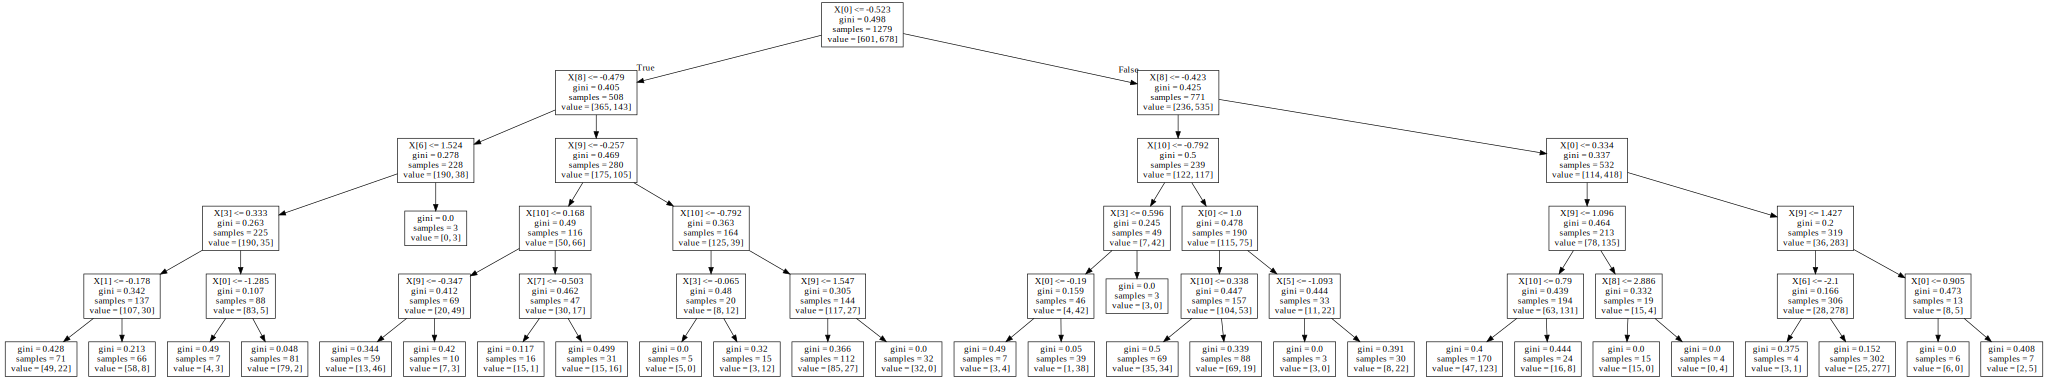

In [ ]:
# We can visualize the trained decision tree
dot_data = export_graphviz(clf_dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph


**Q** Take a look at the Decision Tree visualization above. Explain what you see in the root node and the first node to the left of the root. You do not need to explain the gini values. 

**A** 

----
Next week, you will continue the modeling for this dataset, including more error metrics (e.g., ROC curves), hyperparameter tuning, and random forests. 